In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
pima_df=pd.read_csv('diabetes.csv')
feature_cols=['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure', 'DiabetesPedigreeFunction']
x=pima_df[feature_cols]
y=pima_df['Outcome']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)
print(f'Train data: {x_train.shape},{y_train.shape}')
print(f'Test data: {x_test.shape},{y_test.shape}')  

Train data: (614, 7),(614,)
Test data: (154, 7),(154,)


In [14]:
classifier=RandomForestClassifier(random_state=18)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(f'Accuracy:{metrics.accuracy_score(y_test,y_pred)}')
print(f'Precision:{metrics.precision_score(y_test,y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test,y_pred)}')
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix:\n {confusion_matrix}')

Accuracy:0.7402597402597403
Precision:0.7105263157894737
F1 score: 0.574468085106383
Confusion Matrix:
 [[87 11]
 [29 27]]


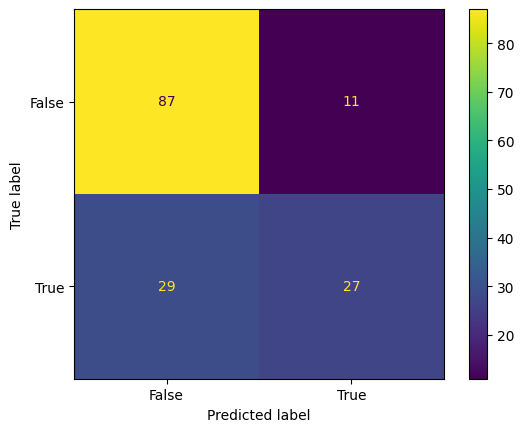

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        98
           1       0.71      0.48      0.57        56

    accuracy                           0.74       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.74      0.74      0.73       154



In [16]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()
class_report=metrics.classification_report(y_test,y_pred)
print("Classification Report:")
print(class_report)